# Titanic: Learning From Disaster

The dataset gives information about the details of the passengers aboard the titanic and a column on survival of the passengers. Those who survived are represented as “1” while those who did not survive are represented as “0”. The goal of this exercise is to determine if with the other features/information about the passengers it is possible to determine those who are likely to survive.

N.B: The terms column, feature and information all have the same meaning here and can be used interchangeably.
I would take some features/columns and visualize it to gain insight into the dataset and determine if some certain features are likely to determine if a passenger would survive or not.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# Look pretty...
matplotlib.style.use('ggplot')


df = pd.read_csv('train.csv')
print(df.head())
print(df.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

First, the dataset is cleaned up to remove or replace missing values. The columns in the dataset are;

PassengerId: Passenger Identity
Survived: Whether passenger survived or not 
Pclass: Class of ticket
Name: Name of passenger     
Sex: Sex of passenger (Male or Female)   
Age: Age of passenger  
SibSp: Number of sibling and/or spouse travelling with passenger
Parch: Number of parent and/or children travelling with passenger           
Ticket: Ticket number     
Fare: Price of ticket 
Cabin: Cabin number


In [3]:
df.Age.fillna(df.Age.median(), inplace=True)
df['Embarked'].fillna(method='ffill', inplace=True)
df['Cabin'].fillna(method='ffill', inplace=True)
df['Cabin'].fillna("C123", inplace=True)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Lets look at the visual analysis of our dataset

#### Sex of Passengers

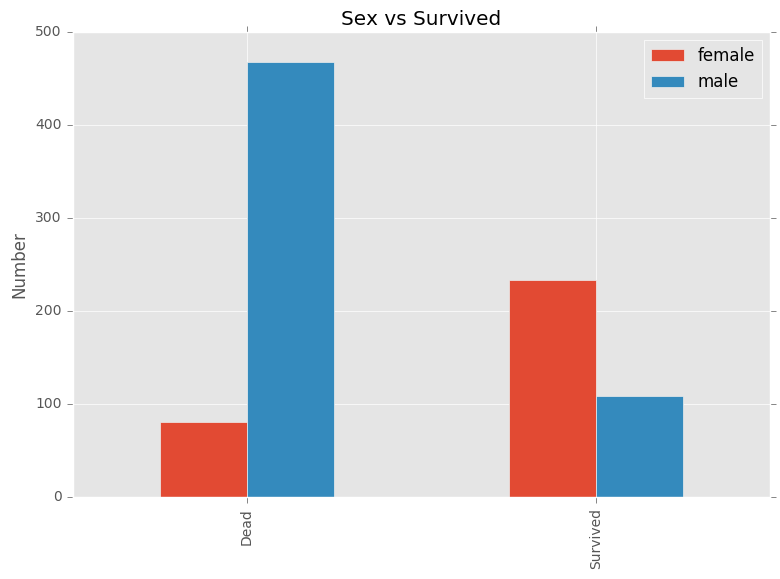

In [4]:
#Using Bar Chart
sex_dead = df.Sex[(df.Survived == 0)].value_counts()
sex_survive = df.Sex[(df.Survived == 1)].value_counts()
ax = pd.DataFrame([sex_dead, sex_survive])
ax.index = ['Dead','Survived']
ax.plot.bar(title='Sex vs Survived', figsize=(9, 6))
plt.ylabel('Number')
plt.show()

More females survive than males.

#### AGE

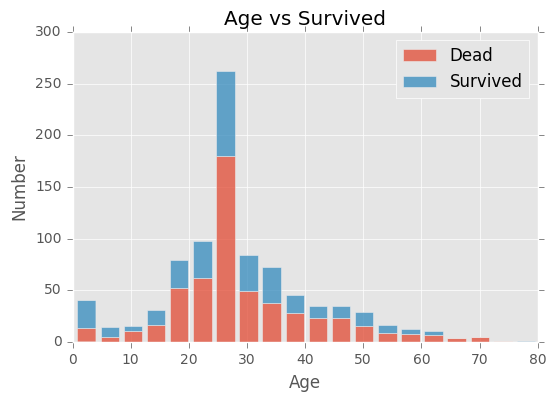

In [8]:
#Using Histogram
s1 = df.Age[(df.Survived == 0)]
s2 = df.Age[(df.Survived == 1)]
plt.hist([s1, s2], alpha=0.75, bins = 20, stacked=True, label = ['Dead','Survived'])
plt.title('Age vs Survived')
plt.xlabel('Age')
plt.ylabel('Number')
plt.legend()
plt.show()

#### CLASS OF TICKET(Pclass)

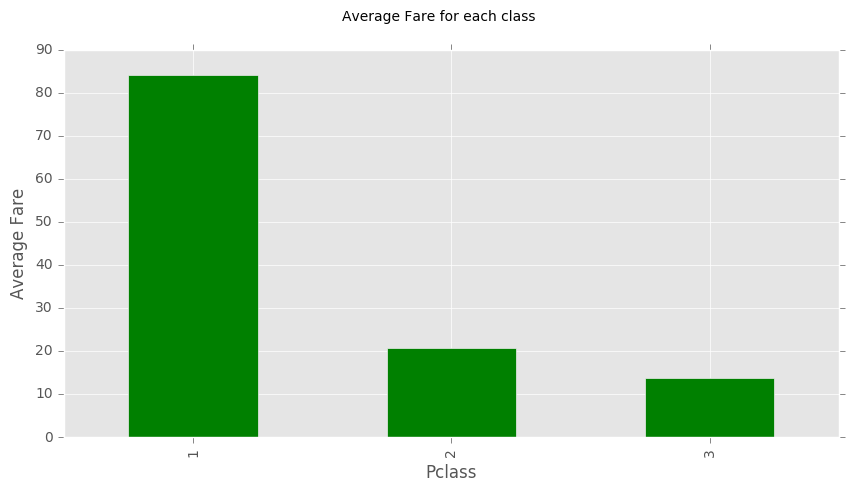

In [11]:
#Using GroupBy
grop = df.groupby('Pclass').mean()['Fare']
grop.plot(kind='bar', stacked=True, figsize=[10,5], colormap='ocean')
plt.suptitle('Average Fare for each class')
plt.ylabel('Average Fare')
plt.show()


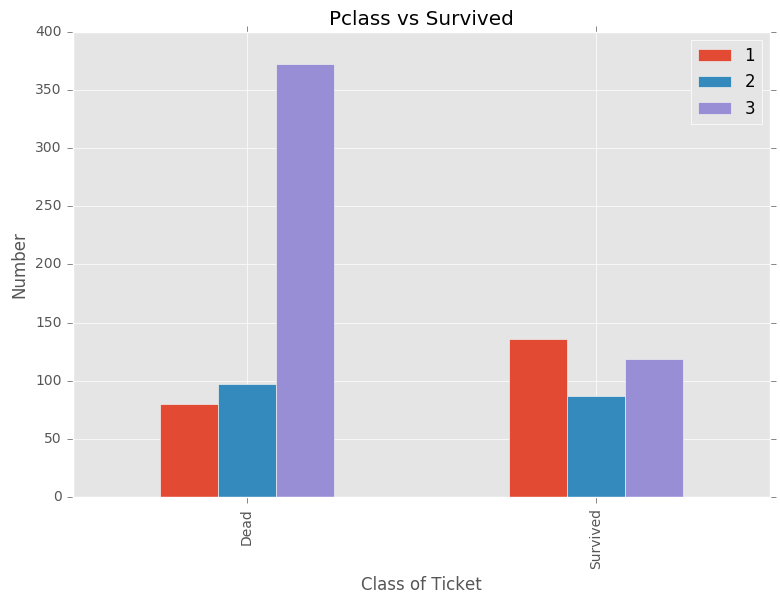

In [12]:
#Using Bar Chart
class_dead = df.Pclass[(df.Survived == 0)].value_counts()
class_survive = df.Pclass[(df.Survived == 1)].value_counts()
ax = pd.DataFrame([class_dead, class_survive])
ax.index = ['Dead','Survived']
ax.plot.bar(title='Pclass vs Survived', figsize=(9, 6))
plt.xlabel('Class of Ticket')
plt.ylabel('Number')
plt.show()

The first graph shows us that Pclass 1 on the average is more expensive while Pclass 3 is the least expensive, and the second graph shows that passengers with Pclass 1 tickets are more likely to survive and Pclass 3 ticket holders are less likely to survive.

#### Port Embarked

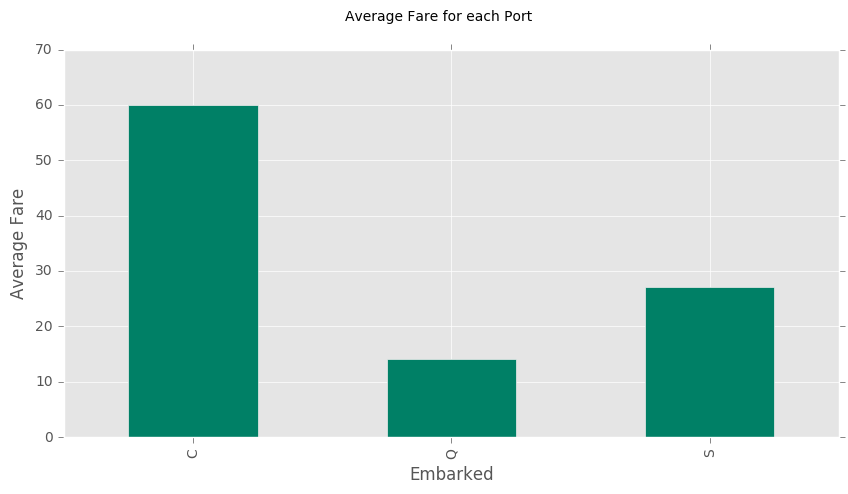

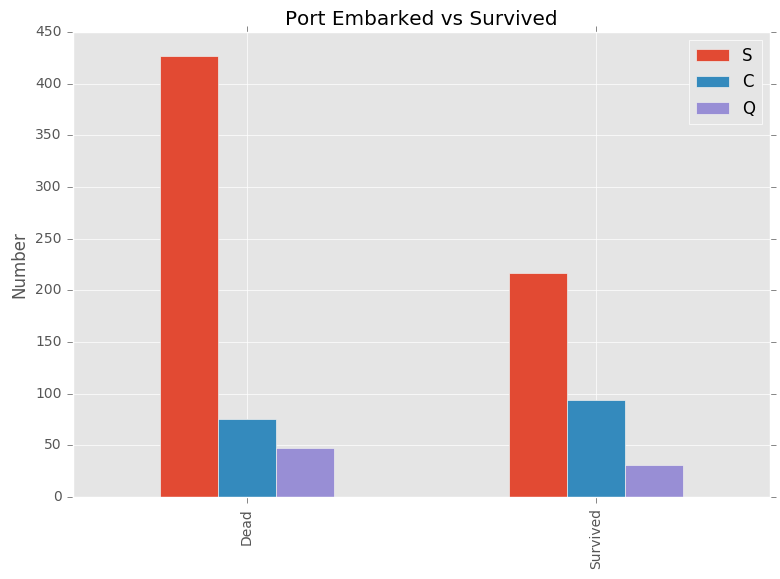

In [13]:
port = df.groupby('Embarked').mean()['Fare']
port.plot(kind='bar', stacked=True, figsize=[10,5], colormap='summer')
plt.suptitle('Average Fare for each Port')
plt.ylabel('Average Fare')
plt.show()


embark_dead = df.Embarked[(df.Survived == 0)].value_counts()
embark_survive = df.Embarked[(df.Survived == 1)].value_counts()
ax = pd.DataFrame([embark_dead, embark_survive])
ax.index = ['Dead','Survived']
ax.plot.bar(title='Port Embarked vs Survived', figsize=(9, 6))
plt.ylabel('Number')
plt.show()

The first graph shows that Port C is on the average more expensive that the other ports. The second graph shows that those who embarked at port C have a little more likely chance at survival.

Our last two sections have shown us that those who paid more for the trip are more likely to survive.

#### FAMILY MEMBERS
I’ve added the Sibling/Spouse column with the Parent/Children column to make a Family column. We would now use this Family column to visualize if passengers with family aboard are likely to survive or not.


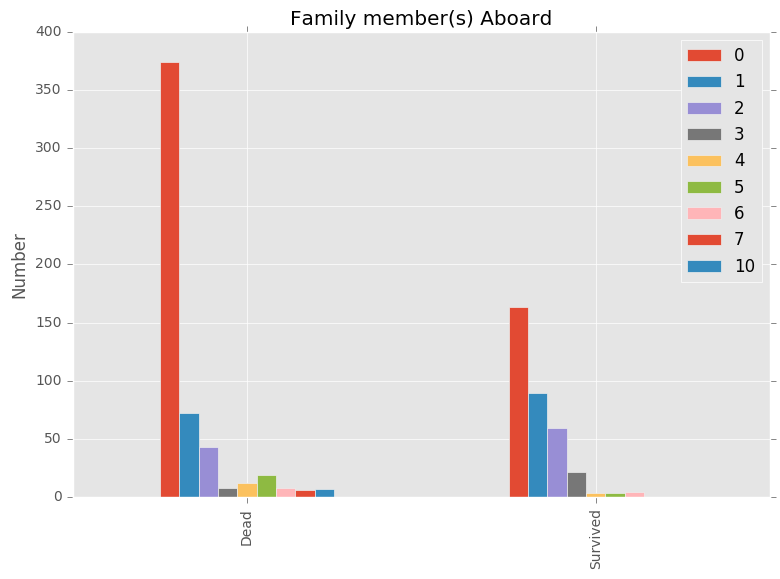

In [14]:
df['Family'] = df['SibSp'] + df['Parch']

fa_dead = df.Family[(df.Survived == 0)].value_counts()
fa_survive = df.Family[(df.Survived == 1)].value_counts()
ax = pd.DataFrame([fa_dead, fa_survive])
ax.index = ['Dead','Survived']
ax.plot.bar(title='Family member(s) Aboard', figsize=(9, 6))
plt.ylabel('Number')
plt.show()

### Machine Learning

In [36]:
df = pd.read_csv('train.csv')
df.Sex = df.Sex.map({'male': 0,'female': 1})
df.Embarked = df.Embarked.map({'S': 0,'C': 1, 'Q': 2, np.nan: 0})
df.Age.fillna(df.Age.median(), inplace=True)

#Taking the #Survived column as the label
y = df[['Survived']]
y = y.values.ravel()
#print(y.shape)

#This columns are selected as the features to predict the label
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#print(X.isnull().sum())

#Split the dataset into testing and training sets with 30% for testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


#Using Random Forest Classification to predict the label
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 30, max_depth = 11, random_state=0, oob_score=True)
model.fit(X_train, y_train)

score = model.oob_score_
print ("OOB Score: ", round(score*100, 3))
score = model.score(X_test, y_test)
print ("Score: ", round(score*100, 3))


OOB Score:  82.183
Score:  81.716


Now, to test unseen data against the trained model and output it.

In [38]:
Z = pd.read_csv('test.csv')

Z.Sex = Z.Sex.map({'male': 0,'female': 1})
Z.Embarked = Z.Embarked.map({'S': 0,'C': 1, 'Q': 2, np.nan: 0})
Z.Age.fillna(Z.Age.median(), inplace=True)
Z.Fare.fillna(Z.Fare.median(), inplace=True)
Z['Embarked'].fillna(method='ffill', inplace=True)

P = Z[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#print(P.isnull().sum())
prediction = model.predict(pd.concat([P], axis = 1))


submission = pd.DataFrame({ 'PassengerId': Z['PassengerId'], 'Survived': prediction })

submission.to_csv("submission_.csv", index=False)